In [1]:
#install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.jeson
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadhamzahf","key":"7696aab307d8b4b218767d68a5fe9d3c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d alessiocorrado99/animals10

 97% 570M/586M [00:03<00:00, 166MB/s]
100% 586M/586M [00:04<00:00, 151MB/s]


In [5]:
# unzip
!unzip  animals10.zip  

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3Xbf3ulUg4DQ_EwHaFz.jpeg  
  inflating: raw-img/ragno/OIP-

In [6]:
!ls

animals10.zip  kaggle.json  raw-img  sample_data  translate.py


In [7]:
!ls /content/raw-img/

cane	 elefante  gallina  mucca   ragno
cavallo  farfalla  gatto    pecora  scoiattolo


In [8]:
import os

animals = os.path.join('/content/raw-img/')

print(os.listdir(animals))

['gallina', 'cavallo', 'elefante', 'ragno', 'gatto', 'cane', 'farfalla', 'scoiattolo', 'pecora', 'mucca']


In [9]:
import shutil

ignore_animals = ['elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora']

for x in ignore_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [10]:
list_animals = os.listdir(animals)
print(list_animals)

['cavallo', 'ragno', 'cane', 'scoiattolo']


In [20]:
from PIL import Image
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-', img.size)
  print('**************')

print('\nTotal :', total)

cavallo: 2623
- (300, 238)
- (300, 192)
- (300, 225)
- (300, 235)
**************
ragno: 4821
- (300, 199)
- (213, 293)
- (300, 200)
- (300, 291)
**************
cane: 4863
- (300, 200)
- (300, 199)
- (282, 300)
- (300, 225)
**************
scoiattolo: 1862
- (225, 300)
- (300, 169)
- (300, 194)
- (300, 200)
**************

Total : 14169


<function matplotlib.pyplot.show>

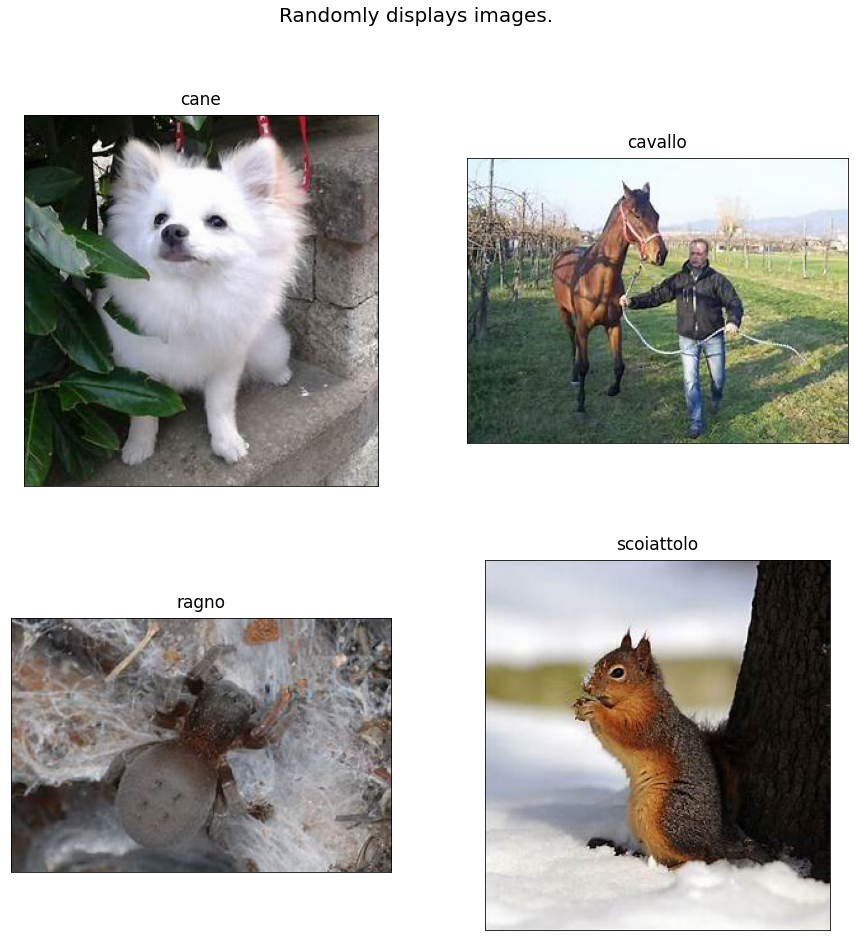

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Randomly displays images.", fontsize=20)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id] 
      animals_id += 1
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=17)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [38]:
data_train = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
    )

data_val = train_datagen.flow_from_directory(
    animals, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
    )

Found 11337 images belonging to 4 classes.
Found 2832 images belonging to 4 classes.


In [44]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])


In [53]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()


In [55]:
history = model.fit(data_train, 
                    epochs = 40, 
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val, 
                    validation_steps = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/40
44/44 [==============================] - 83s 2s/step - loss: 0.3531 - accuracy: 0.8687 - val_loss: 0.3850 - val_accuracy: 0.8608
Epoch 2/40
44/44 [==============================] - 83s 2s/step - loss: 0.3543 - accuracy: 0.8668 - val_loss: 0.4207 - val_accuracy: 0.8413
Epoch 3/40
44/44 [==============================] - 82s 2s/step - loss: 0.3537 - accuracy: 0.8659 - val_loss: 0.4428 - val_accuracy: 0.8491
Epoch 4/40
44/44 [==============================] - 83s 2s/step - loss: 0.3607 - accuracy: 0.8638 - val_loss: 0.3887 - val_accuracy: 0.8509
Epoch 5/40
44/44 [==============================] - 86s 2s/step - loss: 0.3429 - accuracy: 0.8703 - val_loss: 0.3904 - val_accuracy: 0.8555
Epoch 6/40
44/44 [==============================] - 86s 2s/step - loss: 0.3452 - accuracy: 0.8723 - val_loss: 0.3831 - val_accuracy: 0.8608
Epoch 7/40
44/44 [==============================] - 84s 2s/step - loss: 0.3174 - accuracy: 0.8797 - val_loss: 0.3698 - val_accuracy: 0.8604
Epoch 8/40
44/44 [==

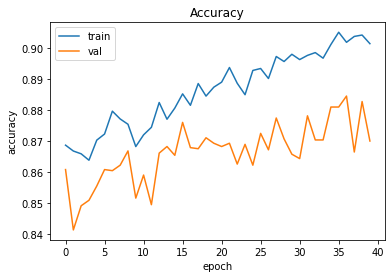

In [56]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

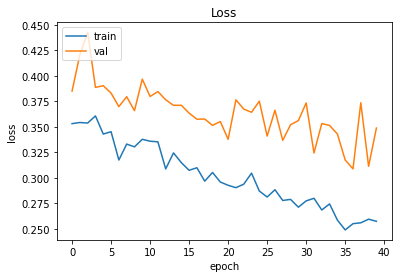

In [57]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpszhscqfx/assets


In [59]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900460 Oct 13 15:17 model.tflite
